In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rating/IMDb Movies India.csv


In [2]:
import pandas as pd

movie_dataset = pd.read_csv('/kaggle/input/rating/IMDb Movies India.csv',encoding = 'latin1')

movie_dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#step-1 remove non rating movies reduce size 15k to 5k
from sklearn.preprocessing import LabelEncoder
movie_ds = movie_dataset.loc[:,:].dropna()

le = LabelEncoder()
movie_ds['Name'] = le.fit_transform(movie_ds.Name)
movie_ds['Year'] = le.fit_transform(movie_ds.Year)
movie_ds['Duration'] = le.fit_transform(movie_ds.Duration)
movie_ds['Genre'] = le.fit_transform(movie_ds.Genre)
movie_ds['Director'] = le.fit_transform(movie_ds.Director)

movie_ds['Actor 1'] = le.fit_transform(movie_ds['Actor 1'])
movie_ds['Actor 2'] = le.fit_transform(movie_ds['Actor 2'])
movie_ds['Actor 3'] = le.fit_transform(movie_ds['Actor 3'])

movie_ds

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,88,9,229,7.0,8,629,1352,2272,319
3,1,88,10,184,4.4,35,1335,1198,719,2148
5,3,66,47,157,4.7,827,1530,378,75,2045
6,4,74,42,289,7.4,"1,086",2044,692,1112,2524
8,76,81,156,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,5380,84,15,229,6.1,408,1223,1861,1801,1615
15494,5381,70,53,133,6.2,"1,496",2059,763,1619,1184
15503,5382,58,25,28,5.8,44,1793,406,754,1685
15505,5384,68,29,38,4.5,655,1025,112,2164,314


In [4]:
#train and test the dataset

from sklearn.model_selection import train_test_split

x = movie_ds[['Genre','Director','Actor 1','Actor 2','Actor 3']].values

y = movie_ds['Rating'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)

pred = reg.predict(x_test)
pred

array([5.6649226 , 6.02970932, 5.92768176, ..., 6.19784917, 5.973814  ,
       6.23269044])

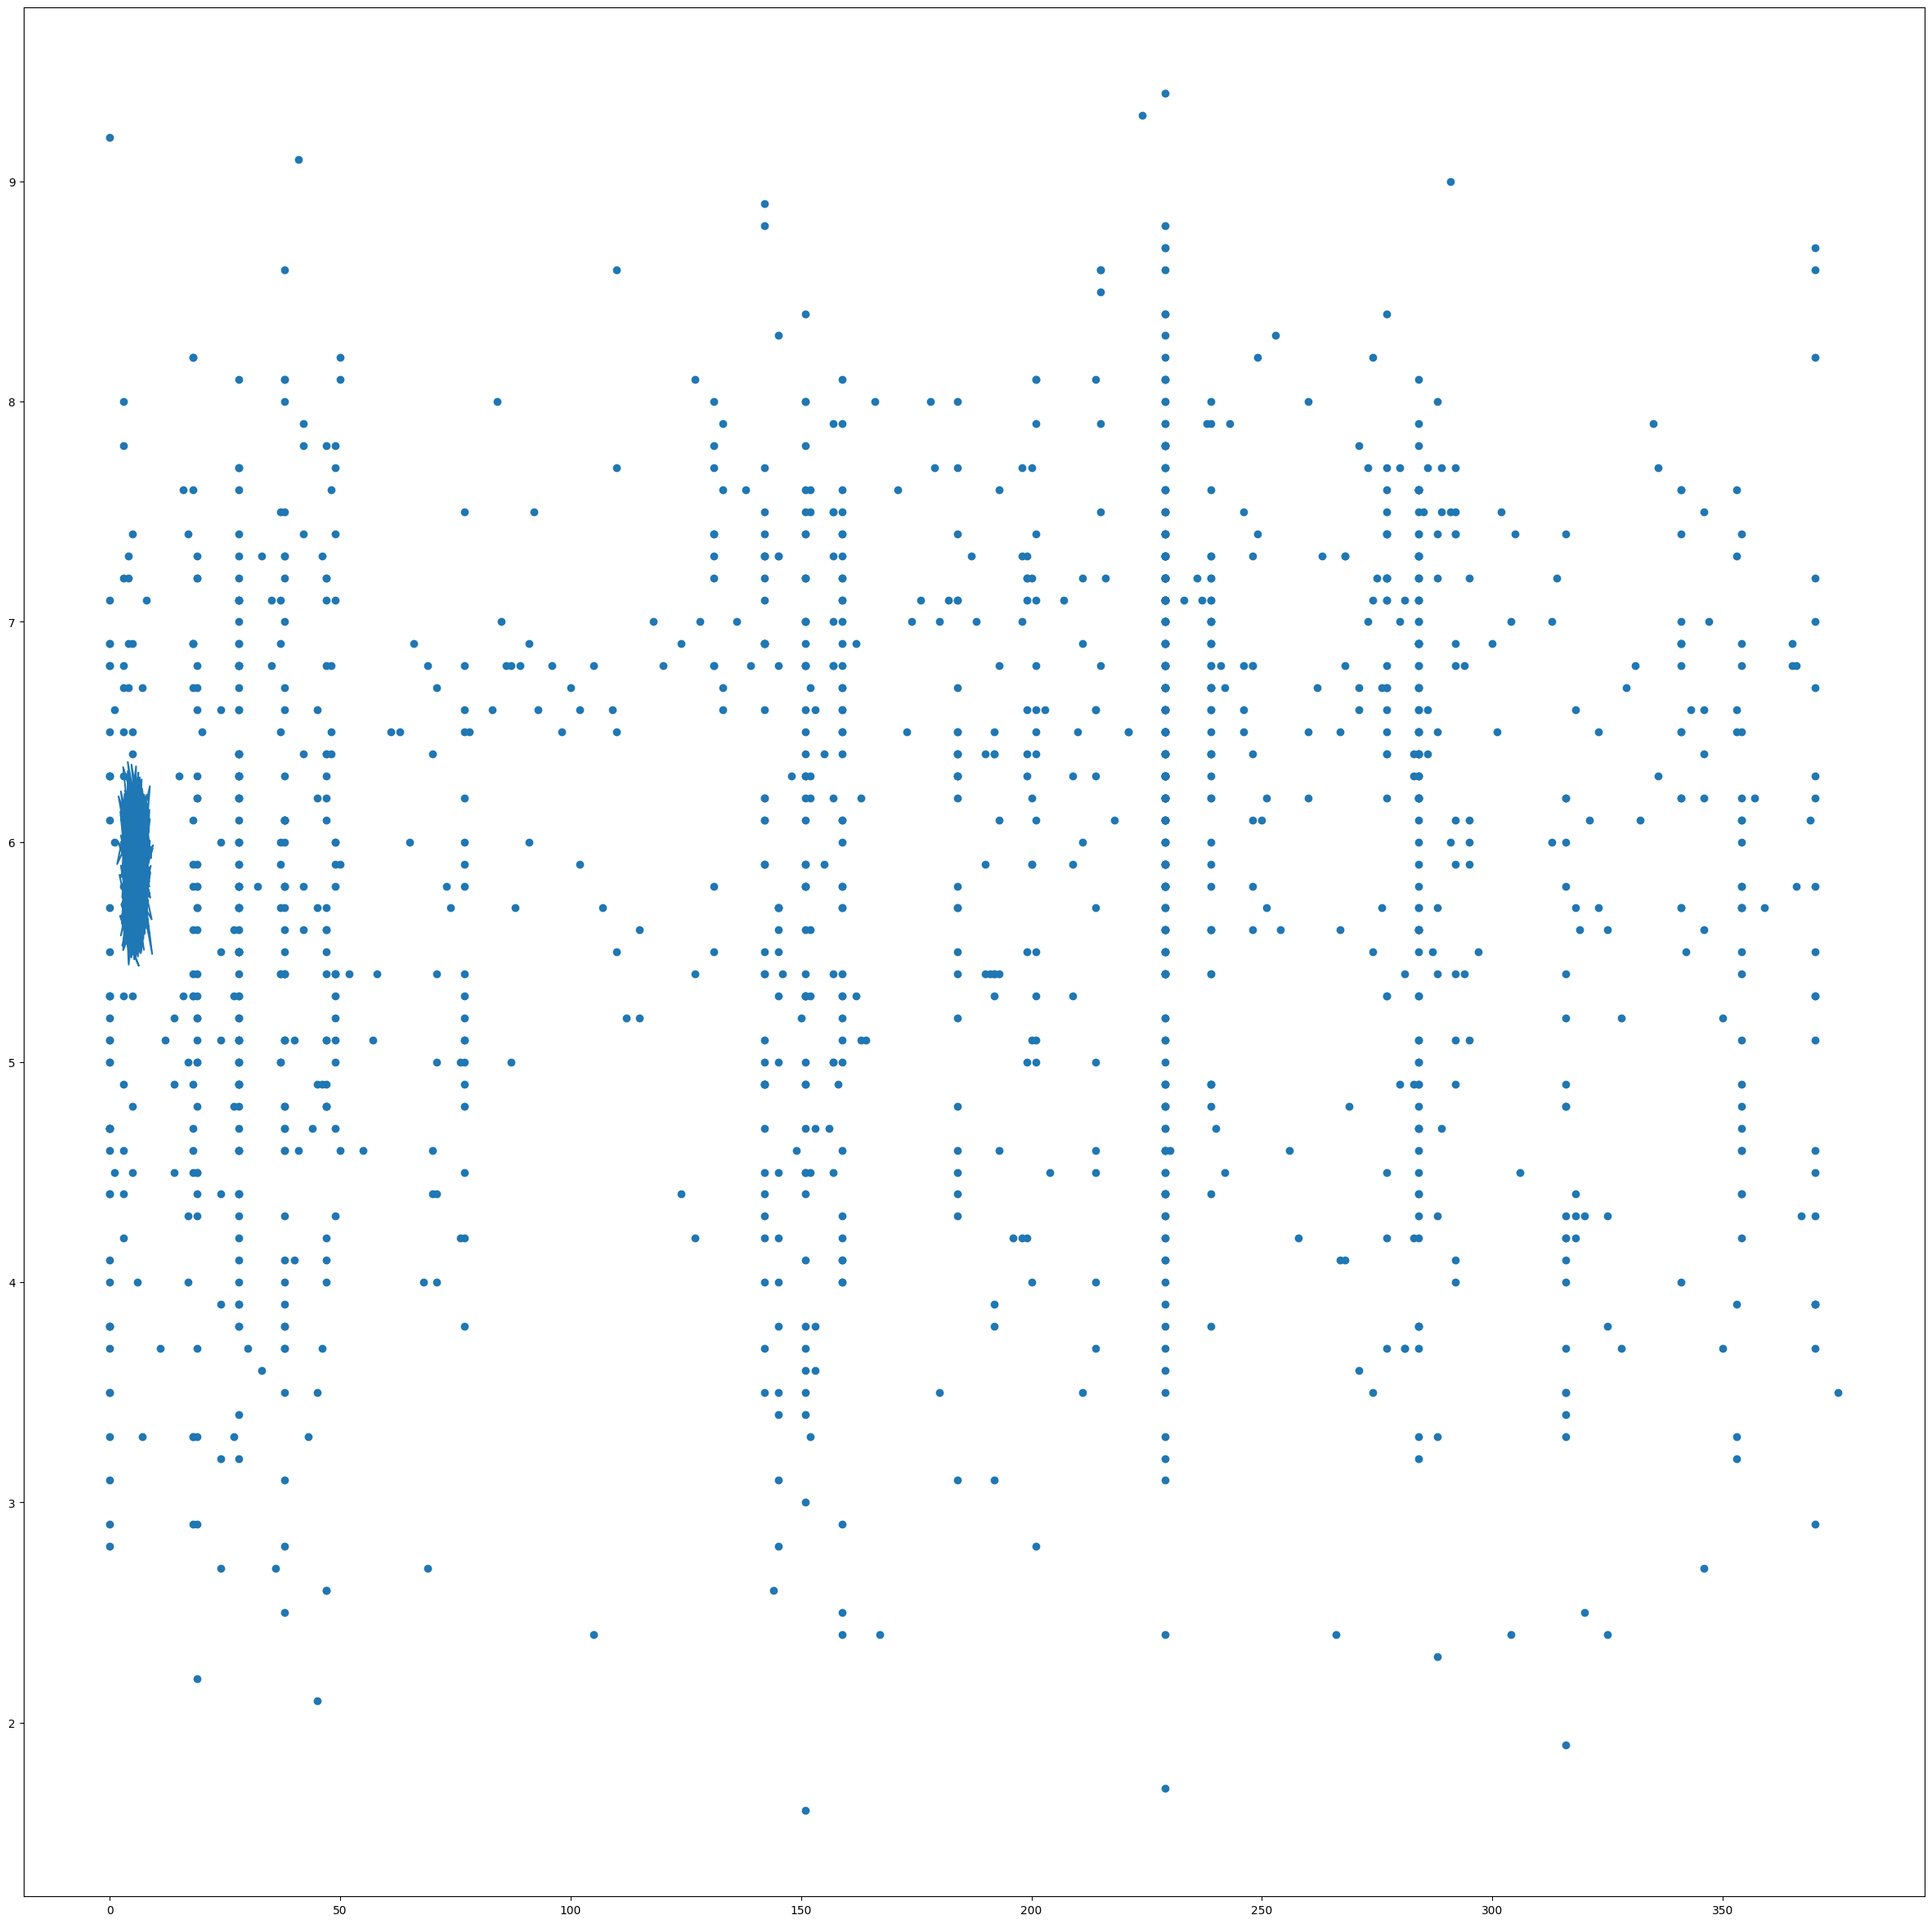

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.scatter(x_test[:,0],y_test)
plt.plot(y_test,pred)
plt.show()